# 안녕하세요^^ 
## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 '에이블러용' 폴더에 있습니다.

[기본 데이터]
* seoul_moving_month_202401.csv

[데이터 소개]
* 서울 시 구별 이동 2024년 1월 데이터
* https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_202401.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_202401.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

import pandas as pd
seoul_moving = pd.read_csv('1.2 seoul_moving_month_202401.csv',sep=",", encoding = 'UTF-8')

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(29361031, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,29361031.0,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07
mean,202401.0,1.362194e+01,1.710538e+04,1.718123e+04,4.285979e+01,9.366626e+01
std,0.0,5.835017e+00,9.024981e+03,9.037102e+03,1.799456e+01,7.803316e+01
min,202401.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+00
25%,202401.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,4.900000e+01
50%,202401.0,1.400000e+01,1.120000e+04,1.120000e+04,4.000000e+01,7.400000e+01
75%,202401.0,1.800000e+01,3.101400e+04,3.101400e+04,5.500000e+01,1.120000e+02
max,202401.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,4.462000e+03


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


* 1번 열의 의미
    * " 2024년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 E(기타)로 이동한 10 ~ 15세 여성은 총 11.96명이며 이들의 평균 이동시간은 167분이다


#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '이동인구(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)
    - 3명 미만의 이동인구는 * 처리 되어 있어서 해당 값을 나름의 기준으로 변경하세요.(중위값)
    - '이동인구(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# value_counts()
seoul_moving['이동인구(합)'].value_counts()

*          3870174
6.05        420734
3.30        397265
3.29        286071
3.31        234821
            ...   
1617.95          1
2414.11          1
1499.98          1
1478.45          1
689.93           1
Name: 이동인구(합), Length: 140404, dtype: int64

In [8]:
# '*' 값의 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체 (1.5명)
seoul_moving.loc[seoul_moving['이동인구(합)']=='*','이동인구(합)']='1.5'

In [9]:
seoul_moving['이동인구(합)'].value_counts()

1.5        3870174
6.05        420734
3.30        397265
3.29        286071
3.31        234821
            ...   
1617.95          1
2414.11          1
1499.98          1
1478.45          1
689.93           1
Name: 이동인구(합), Length: 140404, dtype: int64

In [10]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
# astype()
seoul_moving['이동인구(합)']=seoul_moving['이동인구(합)'].astype(float)

In [11]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.2+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 이동유형, value_counts()
seoul_moving['이동유형'].value_counts()

EH    5947038
HE    5585412
EE    5224553
WH    3078348
WE    2759477
HW    2700535
EW    2330931
WW    1082641
HH     652096
Name: 이동유형, dtype: int64

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 요일, value_counts()
seoul_moving['요일'].value_counts()

월    4448237
수    4341429
화    4300070
토    4254525
금    4251430
목    4005959
일    3759381
Name: 요일, dtype: int64

* 24년 1월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 5, 화 : 5, 수 : 5, 목 : 4, 금 : 4, 토 : 4

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 성별, value_counts()
seoul_moving['성별'].value_counts()

M    16433525
F    12927506
Name: 성별, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 새벽 5시까지 도착하는 이동 사례, seoul_moving_night 변수 저장
seoul_moving_night = seoul_moving.loc[seoul_moving['도착시간'] < 5 ]
seoul_moving_night['요일'].value_counts()

토    378112
월    362697
수    337301
일    335062
화    327124
금    326755
목    310690
Name: 요일, dtype: int64

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다.
* 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31)

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 출발 시군구 코드, 도착 시군구 코드 <20000
seoul_moving = seoul_moving.loc[(seoul_moving['출발 시군구 코드']<20000) & (seoul_moving['도착 시군구 코드']<20000)]

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10791769 entries, 0 to 29320196
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 905.7+ MB


#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유출이 제일 많은 구와 적은 구는?
seoul_moving.groupby(by=['출발 시군구 코드'],as_index=False)[['이동인구(합)']].sum().sort_values(by='이동인구(합)',ascending=False)
#유출이 제일 많은 구 : 강남구, 유출이 가장 적은 구:금천구

,출발 시군구 코드,이동인구(합)
22,11230,50057809.28
23,11240,37555148.90
21,11220,32041311.81
18,11190,27353682.41
13,11140,25209156.39
15,11160,24528710.98
24,11250,23422805.26
1,11020,21663423.16
10,11110,21174815.72
0,11010,20381157.61


In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유입이 제일 많은 구와 적은 구는?
seoul_moving.groupby(by=['도착 시군구 코드'],as_index=False)[['이동인구(합)']].sum().sort_values(by='이동인구(합)',ascending=False)
#유입이 가장 많은 구: 강남구, 적은 구: 금천구

,도착 시군구 코드,이동인구(합)
22,11230,50031784.36
23,11240,37466057.70
21,11220,32114881.69
18,11190,27319166.72
13,11140,25196011.04
15,11160,24764699.10
24,11250,23386329.60
1,11020,21692705.49
10,11110,21162862.01
0,11010,20258827.46


#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '도착시간' >=5
seoul_moving = seoul_moving.loc[seoul_moving['도착시간'] >= 5 ]

In [21]:
seoul_moving.reset_index(drop=True,inplace=True)
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,5,11010,11010,F,0,HE,54,28.28
1,202401,일,5,11010,11010,F,0,HW,30,28.03
2,202401,일,5,11010,11010,F,10,EE,54,6.00
3,202401,일,5,11010,11010,F,10,HE,13,5.82
4,202401,일,5,11010,11010,F,15,EH,44,12.22
...,...,...,...,...,...,...,...,...,...,...
9656715,202401,토,23,11250,11250,M,80,EH,18,28.41
9656716,202401,토,23,11250,11250,M,80,HE,78,9.46
9656717,202401,토,23,11250,11250,M,80,HW,168,9.48
9656718,202401,토,23,11250,11250,M,80,WH,16,47.27


[실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 평균을 구해서 df_mean 변수로 저장
df_mean = seoul_moving.groupby(by='도착 시군구 코드',as_index=False)[['평균 이동 시간(분)','이동인구(합)']].mean()
df_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,59.819645,44.694476
1,11020,58.197800,47.183639
2,11030,57.995736,36.418986
3,11040,58.184820,41.879404
4,11050,60.890991,45.669953
5,11060,59.944131,40.631885
6,11070,63.727215,41.653042
7,11080,59.871429,44.970384
8,11090,65.100321,39.190099
9,11100,66.744401,38.268616


In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 합을 구해서 df_sum 변수로 저장
# 평균이동시간(분) -> 총 이동 시간, 이동인구(합) -> 총 이동인구로 이름 대체
df_sum = seoul_moving.groupby(by='도착 시군구 코드',as_index=False)[['평균 이동 시간(분)','이동인구(합)']].sum()
df_sum.rename(columns={"평균 이동 시간(분)":"총 이동 시간", "이동인구(합)":"총 이동인구"},inplace=True)
df_sum

,도착 시군구 코드,총 이동 시간,총 이동인구
0,11010,26504649,19803049.50
1,11020,26065980,21132891.17
2,11030,23776976,14930983.13
3,11040,24144722,17378528.65
4,11050,23556776,17668243.56
5,11060,24882389,16866011.11
6,11070,21685479,14173946.94
7,11080,24434129,18352863.32
8,11090,20733085,12481223.62
9,11100,19132149,10969622.19


In [37]:
# 파일을 합쳐볼까요
# pd.merge()

# df_mean
# df_sum

seoul_moving = pd.merge(df_sum,df_mean, how='inner', on='도착 시군구 코드')

In [41]:
# 구 이름에 대한 딕셔너리 생성
code_to_district = {
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'
}

# '도착 시군구 코드'를 구 이름으로 매핑
seoul_moving['도착 시군구'] = seoul_moving['도착 시군구 코드'].map(code_to_district)

In [42]:
seoul_moving

,도착 시군구 코드,총 이동 시간,총 이동인구,평균 이동 시간(분),이동인구(합),도착 시군구
0,11010,26504649,19803049.50,59.819645,44.694476,종로구
1,11020,26065980,21132891.17,58.197800,47.183639,중구
2,11030,23776976,14930983.13,57.995736,36.418986,용산구
3,11040,24144722,17378528.65,58.184820,41.879404,성동구
4,11050,23556776,17668243.56,60.890991,45.669953,광진구
5,11060,24882389,16866011.11,59.944131,40.631885,동대문구
6,11070,21685479,14173946.94,63.727215,41.653042,중랑구
7,11080,24434129,18352863.32,59.871429,44.970384,성북구
8,11090,20733085,12481223.62,65.100321,39.190099,강북구
9,11100,19132149,10969622.19,66.744401,38.268616,도봉구


In [43]:
# 해당 데이터프레임을 csv 파일로 저장하세요
# to_csv()
seoul_moving.to_csv('seoul_moving.csv',index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [44]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

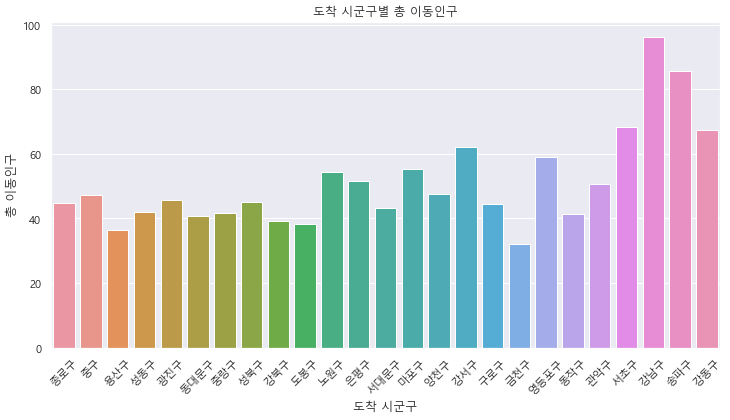

In [46]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 시각화를 위한 데이터 준비
plt.figure(figsize=(12, 6))
sns.barplot(x='도착 시군구', y='이동인구(합)', data=seoul_moving)

# 그래프 제목과 축 이름 설정
plt.title('도착 시군구별 총 이동인구')
plt.xlabel('도착 시군구')
plt.ylabel('총 이동인구')

# x축 라벨 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

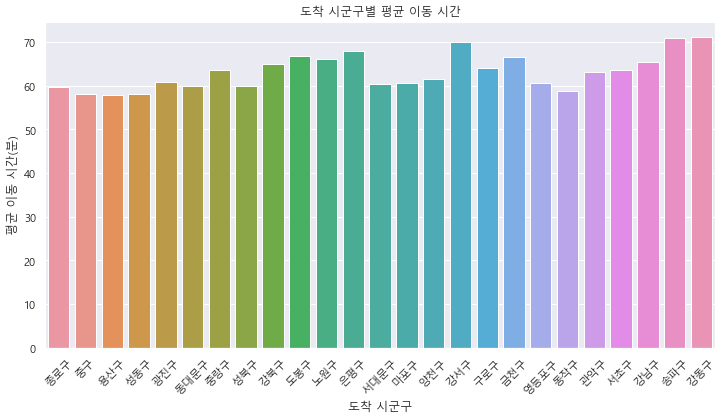

In [48]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 시각화를 위한 데이터 준비
plt.figure(figsize=(12, 6))
sns.barplot(x='도착 시군구', y='평균 이동 시간(분)', data=seoul_moving)

# 그래프 제목과 축 이름 설정
plt.title('도착 시군구별 평균 이동 시간')
plt.xlabel('도착 시군구')
plt.ylabel('평균 이동 시간(분)')

# x축 라벨 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

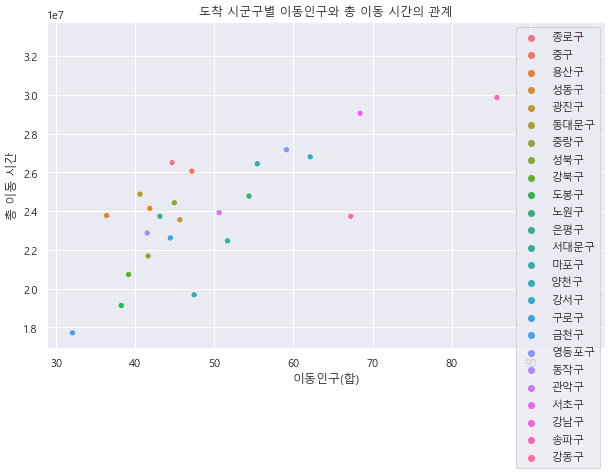

In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 시각화를 위한 데이터 준비
plt.figure(figsize=(10, 6))
sns.scatterplot(x='이동인구(합)', y='총 이동 시간', hue='도착 시군구', data=seoul_moving)

# 그래프 제목과 축 이름 설정
plt.title('도착 시군구별 이동인구와 총 이동 시간의 관계')
plt.xlabel('이동인구(합)')
plt.ylabel('총 이동 시간')

# 범례 위치 조정
plt.legend(loc='upper right')

# 그래프 출력
plt.show()

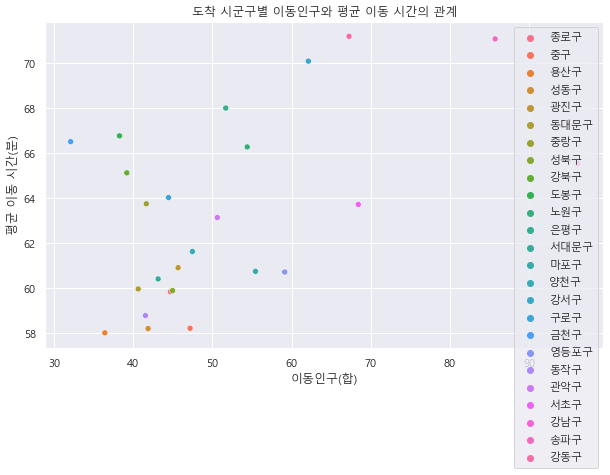

In [51]:
# 시각화를 위한 데이터 준비
plt.figure(figsize=(10, 6))
sns.scatterplot(x='이동인구(합)', y='평균 이동 시간(분)', hue='도착 시군구', data=seoul_moving)

# 그래프 제목과 축 이름 설정
plt.title('도착 시군구별 이동인구와 평균 이동 시간의 관계')
plt.xlabel('이동인구(합)')
plt.ylabel('평균 이동 시간(분)')

# 범례 위치 조정
plt.legend(loc='upper right')

# 그래프 출력
plt.show()

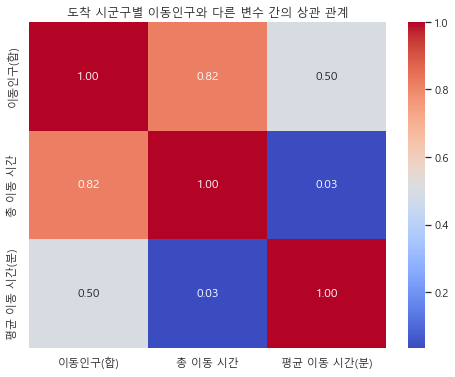

In [54]:
# 상관 행렬 계산
corr_matrix = seoul_moving[['이동인구(합)', '총 이동 시간', '평균 이동 시간(분)']].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 그래프 제목 설정
plt.title('도착 시군구별 이동인구와 다른 변수 간의 상관 관계')

# 그래프 출력
plt.show()


In [30]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 총 이동시간과 이동인구(합)은 0.82로 상당히 높은 양의 상관관계를 보인다.
# 2.
# 3.

---